In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot

In [2]:
df_february = pd.read_csv("february_with_clusters.csv",index_col=False)
df_may = pd.read_csv("may_with_clusters.csv")
df_february.head(5).append(df_february.tail(5))

,Unnamed: 0,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,...,visits_cat,clicks_cat,bookings_cat,booking_amount_cat,outgoings_cat,revenue_cat_2,ymd_3,bookings_cat_2,booking_amount_cat_3,booking_clusters
0,0,20190201,19219,17289,23752.189583,1072,2.152443e+05,1.914921e+05,0,0,...,1,1,0,0,0,0,20190201,0,0,2
1,1,20190201,204923,184276,250169.068436,11775,2.176644e+06,1.926475e+06,0,0,...,6,6,5,4,4,8,20190201,5,4,0
2,2,20190201,14788,13273,10381.106892,492,9.205639e+04,8.167528e+04,0,0,...,0,0,0,0,0,0,20190201,0,0,3
3,3,20190201,106112,95555,72563.524075,3621,7.719909e+05,6.994274e+05,0,0,...,3,3,1,1,1,2,20190201,1,1,1
4,4,20190201,13823,12441,10472.761095,486,1.003405e+05,8.986775e+04,0,0,...,0,0,0,0,0,0,20190201,0,0,3
331,331,20190228,53861,48482,41530.734091,2183,5.039255e+05,4.623948e+05,1,0,...,2,2,1,1,1,1,20190228,1,1,1
332,332,20190228,4129,3703,1917.595339,100,2.032529e+04,1.840769e+04,0,1,...,0,0,0,0,0,0,20190228,0,0,4
333,333,20190228,34450,31096,15142.516783,846,1.991500e+05,1.840074e+05,0,1,...,1,1,0,0,0,0,20190228,0,0,2
334,334,20190228,3844,3491,2451.847750,67,1.371000e+04,1.125816e+04,0,0,...,0,0,0,0,0,0,20190228,0,0,4
335,335,20190228,30346,27368,20287.690753,465,9.486661e+04,7.457892e+04,0,0,...,1,1,0,0,0,0,20190228,0,0,8


In [3]:
df_1 = pd.read_csv("test1.csv")
df_2 = pd.read_csv("test2.csv")

In [4]:
df_total = df_1.copy()
df_total = df_total.append(df_2)
df_total.head(5).append(df_total.tail(5))

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05
367,2019-05-31,AU,control,52765,47560,49945.837451,2382,5.026111e+05
368,2019-05-31,BR,test,3220,2804,1300.393503,95,1.963787e+04
369,2019-05-31,BR,control,29971,26943,10280.212939,767,1.571366e+05
370,2019-05-31,JP,test,4596,3986,3389.562888,103,2.119438e+04
371,2019-05-31,JP,control,45121,40554,26687.246918,874,1.726301e+05


In [5]:
df_february.columns

Index(['Unnamed: 0', 'ymd', 'visits', 'clicks', 'revenue', 'bookings',
       'booking_amount', 'outgoings', 'platform_AU', 'platform_BR',
       'platform_DE', 'platform_JP', 'platform_UK', 'platform_US',
       'platform_nan', 'group_control', 'group_test', 'group_nan',
       'revenue_cat', 'visits_cat', 'clicks_cat', 'bookings_cat',
       'booking_amount_cat', 'outgoings_cat', 'revenue_cat_2', 'ymd_3',
       'bookings_cat_2', 'booking_amount_cat_3', 'booking_clusters'],
      dtype='object')

In [6]:
df_february = df_february.rename(columns={"ymd_3": "ymd_2"})

In [7]:
df_may.columns

Index(['Unnamed: 0', 'ymd', 'visits', 'clicks', 'revenue', 'bookings',
       'booking_amount', 'outgoings', 'platform_AU', 'platform_BR',
       'platform_DE', 'platform_JP', 'platform_UK', 'platform_US',
       'platform_nan', 'group_control', 'group_test', 'group_nan',
       'revenue_cat', 'visits_cat', 'clicks_cat', 'bookings_cat',
       'outgoings_cat', 'revenue_cat_2', 'ymd_2', 'bookings_cat_2',
       'booking_amount_cat', 'booking_amount_cat_3', 'booking_clusters'],
      dtype='object')

In [8]:
del df_february['Unnamed: 0']
del df_may['Unnamed: 0']
del df_february['platform_nan']
del df_may['platform_nan']

In [9]:
df_may.head()

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,...,visits_cat,clicks_cat,bookings_cat,outgoings_cat,revenue_cat_2,ymd_2,bookings_cat_2,booking_amount_cat,booking_amount_cat_3,booking_clusters
0,20190501,18978,16560,22868.156215,1400,3.079888e+05,2.851206e+05,0,0,0,...,0,0,0,1,0,20190501,0,0,0,3
1,20190501,188086,169373,208131.939979,13558,2.780706e+06,2.572574e+06,0,0,0,...,5,5,5,8,5,20190501,5,5,5,0
2,20190501,8441,7358,5214.547510,348,6.683872e+04,6.162417e+04,0,0,1,...,0,0,0,0,0,20190501,0,0,0,2
3,20190501,90793,81661,55249.407028,3185,6.243513e+05,5.691018e+05,0,0,1,...,3,3,1,2,2,20190501,1,1,1,1
4,20190501,10907,9557,8853.686349,403,8.820581e+04,7.935213e+04,0,0,0,...,0,0,0,0,0,20190501,0,0,0,2


In [10]:
df_may.booking_clusters = df_may.booking_clusters + df_february.booking_clusters.max() + 10

In [11]:
df_may.head(5).append(df_may.tail(5))

,ymd,visits,clicks,revenue,bookings,booking_amount,outgoings,platform_AU,platform_BR,platform_DE,...,visits_cat,clicks_cat,bookings_cat,outgoings_cat,revenue_cat_2,ymd_2,bookings_cat_2,booking_amount_cat,booking_amount_cat_3,booking_clusters
0,20190501,18978,16560,22868.156215,1400,3.079888e+05,2.851206e+05,0,0,0,...,0,0,0,1,0,20190501,0,0,0,34
1,20190501,188086,169373,208131.939979,13558,2.780706e+06,2.572574e+06,0,0,0,...,5,5,5,8,5,20190501,5,5,5,31
2,20190501,8441,7358,5214.547510,348,6.683872e+04,6.162417e+04,0,0,1,...,0,0,0,0,0,20190501,0,0,0,33
3,20190501,90793,81661,55249.407028,3185,6.243513e+05,5.691018e+05,0,0,1,...,3,3,1,2,2,20190501,1,1,1,32
4,20190501,10907,9557,8853.686349,403,8.820581e+04,7.935213e+04,0,0,0,...,0,0,0,0,0,20190501,0,0,0,33
367,20190531,52765,47560,49945.837451,2382,5.026111e+05,4.526652e+05,1,0,0,...,1,1,1,1,1,20190531,1,1,1,38
368,20190531,3220,2804,1300.393503,95,1.963787e+04,1.833748e+04,0,1,0,...,0,0,0,0,0,20190531,0,0,0,33
369,20190531,29971,26943,10280.212939,767,1.571366e+05,1.468564e+05,0,1,0,...,1,1,0,0,0,20190531,0,0,0,33
370,20190531,4596,3986,3389.562888,103,2.119438e+04,1.780482e+04,0,0,0,...,0,0,0,0,0,20190531,0,0,0,33
371,20190531,45121,40554,26687.246918,874,1.726301e+05,1.459428e+05,0,0,0,...,1,1,0,0,0,20190531,0,0,0,33


In [12]:
df_analysis = df_february.copy()

In [13]:
df_analysis.shape, df_may.shape

((336, 27), (372, 27))

In [14]:
df_analysis = df_analysis.append(df_may)
df_analysis.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(708, 27)

In [15]:
df_analysis.shape

(708, 27)

In [16]:
analysis_columns = ['visits', 'clicks', 'revenue', 'bookings',
                    'booking_amount']

In [17]:
df_total.head(5)

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05


In [18]:
for col in analysis_columns:
    temp = df_total[col].groupby(df_total['platform']).mean().sort_values(ascending=False)
    print("Average of whole data", col.upper(), "acording to the platform :", temp)

Average of whole data VISITS acording to the platform : platform
US    113881.415254
DE     57255.703390
UK     56243.211864
AU     28361.288136
BR     22509.762712
JP     17682.915254
Name: visits, dtype: float64
Average of whole data CLICKS acording to the platform : platform
US    102337.983051
DE     51463.220339
UK     50548.033898
AU     25498.025424
BR     20225.220339
JP     15881.906780
Name: clicks, dtype: float64
Average of whole data REVENUE acording to the platform : platform
US    132668.620316
UK     40523.826932
DE     35849.222664
AU     25457.177188
JP     12356.863176
BR      8531.690566
Name: revenue, dtype: float64
Average of whole data BOOKINGS acording to the platform : platform
US    7025.949153
DE    1912.313559
UK    1882.084746
AU    1219.271186
BR     575.593220
JP     304.194915
Name: bookings, dtype: float64
Average of whole data BOOKING_AMOUNT acording to the platform : platform
US    1.445594e+06
DE    3.965256e+05
UK    3.903518e+05
AU    2.517423e+05
B

In [19]:
for col in analysis_columns:
    temp = df_total[col].groupby(df_total['group']).mean().sort_values(ascending=False)
    print("Average of whole data", col.upper(), "acording to the platform :", temp)
    print("Ration test over control is % ", (df_total[df_total.group == 'test'][col].mean() / df_total[df_total.group == 'control'][col].mean())*100)
    
    
    

Average of whole data VISITS acording to the platform : group
control    89160.878531
test        9483.887006
Name: visits, dtype: float64
Ration test over control is %  10.636825434985466
Average of whole data CLICKS acording to the platform : group
control    80242.104520
test        8409.358757
Name: clicks, dtype: float64
Ration test over control is %  10.479982806270783
Average of whole data REVENUE acording to the platform : group
control    77302.899945
test        7826.233669
Name: revenue, dtype: float64
Ration test over control is %  10.12411393949746
Average of whole data BOOKINGS acording to the platform : group
control    3890.723164
test        415.745763
Name: bookings, dtype: float64
Ration test over control is %  10.68556525880771
Average of whole data BOOKING_AMOUNT acording to the platform : group
control    802695.335404
test        86204.182422
Name: booking_amount, dtype: float64
Ration test over control is %  10.739340148144237


In [20]:
print("Test group clusters : ", df_analysis[df_analysis.group_test == 1]['booking_clusters'].unique())

Test group clusters :  [ 2  3  4  7  8 34 33 39 52]


In [21]:
print("Control group clusters : ", df_analysis[df_analysis.group_test != 1]['booking_clusters'].unique())

Control group clusters :  [ 0  1  2  3  7 20  8 21 31 32 34 33 38 39 51]


In [22]:
print("Variation clusters of test group from control group : ", set(df_analysis[df_analysis.group_test == 1]['booking_clusters'].unique()).difference(df_analysis[df_analysis.group_test != 1]['booking_clusters'].unique()))
print("Variation clusters of control group from test group : ", set(df_analysis[df_analysis.group_test != 1]['booking_clusters'].unique()).difference(df_analysis[df_analysis.group_test == 1]['booking_clusters'].unique()))




Variation clusters of test group from control group :  {4, 52}
Variation clusters of control group from test group :  {0, 1, 32, 38, 51, 20, 21, 31}


In [23]:
print("***** The cluster distribution of TEST GROUP *****")

for i in df_analysis[df_analysis.group_test == 1]['booking_clusters'].unique():
    print("For test group in ", i, ". cluster number : ", df_analysis[df_analysis.booking_clusters == i].shape)

***** The cluster distribution of TEST GROUP *****
For test group in  2 . cluster number :  (46, 27)
For test group in  3 . cluster number :  (72, 27)
For test group in  4 . cluster number :  (84, 27)
For test group in  7 . cluster number :  (10, 27)
For test group in  8 . cluster number :  (12, 27)
For test group in  34 . cluster number :  (34, 27)
For test group in  33 . cluster number :  (213, 27)
For test group in  39 . cluster number :  (10, 27)
For test group in  52 . cluster number :  (1, 27)


In [24]:
print("***** The cluster distribution of CONTROL GROUP *****")

for i in df_analysis[df_analysis.group_test != 1]['booking_clusters'].unique():
    print("For control group in ", i, ". cluster number : ", df_analysis[df_analysis.booking_clusters == i].shape)

***** The cluster distribution of CONTROL GROUP *****
For control group in  0 . cluster number :  (28, 27)
For control group in  1 . cluster number :  (81, 27)
For control group in  2 . cluster number :  (46, 27)
For control group in  3 . cluster number :  (72, 27)
For control group in  7 . cluster number :  (10, 27)
For control group in  20 . cluster number :  (2, 27)
For control group in  8 . cluster number :  (12, 27)
For control group in  21 . cluster number :  (1, 27)
For control group in  31 . cluster number :  (31, 27)
For control group in  32 . cluster number :  (55, 27)
For control group in  34 . cluster number :  (34, 27)
For control group in  33 . cluster number :  (213, 27)
For control group in  38 . cluster number :  (25, 27)
For control group in  39 . cluster number :  (10, 27)
For control group in  51 . cluster number :  (3, 27)


In [25]:
count1 = 0
count2 = 0
for i in set(df_analysis[df_analysis.group_test == 1]['booking_clusters'].unique()).difference(df_analysis[df_analysis.group_test != 1]['booking_clusters'].unique()):
    print("For test group, difference in ", i, ". cluster number : ", df_analysis[df_analysis.booking_clusters == i].shape[0])
    count1 = count1 + df_analysis[df_analysis.booking_clusters == i].shape[0]

for i in set(df_analysis[df_analysis.group_test != 1]['booking_clusters'].unique()).difference(df_analysis[df_analysis.group_test == 1]['booking_clusters'].unique()):
    print("For control group, difference in ", i, ". cluster number : ", df_analysis[df_analysis.booking_clusters == i].shape[0])
    count2 = count2 + df_analysis[df_analysis.booking_clusters == i].shape[0]

print("Total dif row number of test: ", count1, "on ", df_analysis[df_analysis.group_test == 1].shape[0], "row")

print("Total dif row number of control: ", count2, "on ", df_analysis[df_analysis.group_test != 1].shape[0], "row")


For test group, difference in  4 . cluster number :  84
For test group, difference in  52 . cluster number :  1
For control group, difference in  0 . cluster number :  28
For control group, difference in  1 . cluster number :  81
For control group, difference in  32 . cluster number :  55
For control group, difference in  38 . cluster number :  25
For control group, difference in  51 . cluster number :  3
For control group, difference in  20 . cluster number :  2
For control group, difference in  21 . cluster number :  1
For control group, difference in  31 . cluster number :  31
Total dif row number of test:  85 on  354 row
Total dif row number of control:  226 on  354 row


In [26]:
df_total.columns

Index(['ymd', 'platform', 'group', 'visits', 'clicks', 'revenue', 'bookings',
       'booking_amount'],
      dtype='object')

In [27]:
print("Global average revenue per click : ", df_total.revenue.sum() / df_total.clicks.sum())


Global average revenue per click :  0.9602676647087155


In [28]:
print("Global average revenue per click : ", df_total.revenue.sum() / df_total.clicks.sum())
for plat in df_total.platform.unique():
    print(plat, " average revenue per click : ", df_total[df_total.platform == plat].revenue.sum() / df_total[df_total.platform == plat].clicks.sum())
    

Global average revenue per click :  0.9602676647087155
US  average revenue per click :  1.2963771256821708
DE  average revenue per click :  0.6965988997132233
UK  average revenue per click :  0.8016894784466522
AU  average revenue per click :  0.9983979843336492
BR  average revenue per click :  0.42183424571408945
JP  average revenue per click :  0.7780465751079852


In [29]:
print("Global average revenue in Feb per click : ", df_1.revenue.sum() / df_1.clicks.sum())
for plat in df_1.platform.unique():
    print(plat, " average revenue in Feb per click : ", df_1[df_1.platform == plat].revenue.sum() / df_1[df_1.platform == plat].clicks.sum())
    

Global average revenue in Feb per click :  0.9546378956863012
US  average revenue in Feb per click :  1.2879638345014606
DE  average revenue in Feb per click :  0.6792068604450278
UK  average revenue in Feb per click :  0.8037099579397758
AU  average revenue in Feb per click :  1.0117303855119761
BR  average revenue in Feb per click :  0.4062647753338593
JP  average revenue in Feb per click :  0.7849588111938752


In [30]:
print("Global average revenue in May per click : ", df_2.revenue.sum() / df_2.clicks.sum())
for plat in df_2.platform.unique():
    print(plat, " average revenue in May per click : ", df_2[df_2.platform == plat].revenue.sum() / df_2[df_2.platform == plat].clicks.sum())
    

Global average revenue in May per click :  0.9654082879894842
US  average revenue in May per click :  1.3040633479454482
DE  average revenue in May per click :  0.7126874017659844
UK  average revenue in May per click :  0.7998603404335308
AU  average revenue in May per click :  0.9861921452770107
BR  average revenue in May per click :  0.4359046671545255
JP  average revenue in May per click :  0.7717918158224526


In [31]:
#Calculate correlations
corr = df_total.corr()
corr

,visits,clicks,revenue,bookings,booking_amount
visits,1.000000,0.999996,0.958248,0.950018,0.950191
clicks,0.999996,1.000000,0.958076,0.949758,0.949937
revenue,0.958248,0.958076,1.000000,0.983207,0.982404
bookings,0.950018,0.949758,0.983207,1.000000,0.998095
booking_amount,0.950191,0.949937,0.982404,0.998095,1.000000


In [32]:
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.5
top_corr_columns = cr.loc[:, 'bookings'][:5]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.90].sort_values(ascending=False)
len(best_accurate_columns)

5

In [33]:
best_accurate_columns

bookings          1.000000
booking_amount    0.998095
revenue           0.983207
visits            0.950018
clicks            0.949758
Name: bookings, dtype: float64

In [34]:
figParams = pyplot.rcParams["figure.figsize"]
figParams[0] = 25
figParams[1] = 10
pyplot.rcParams["figure.figsize"] = figParams

In [35]:
df_total.shape

(708, 8)

In [36]:
comparison_columns = ['visits', 'clicks']

In [37]:
def compare_correlation_graph(df_total):
  for colu in comparison_columns:
    df_total[[colu, 'bookings']][:350].plot(figsize=(25,10))
    print("Booking average percentage over ", colu, " is %", (df_total.bookings.sum() / df_total[colu].sum()*100))

Booking average percentage over  visits  is % 4.365633496235007
Booking average percentage over  clicks  is % 4.857752785315744


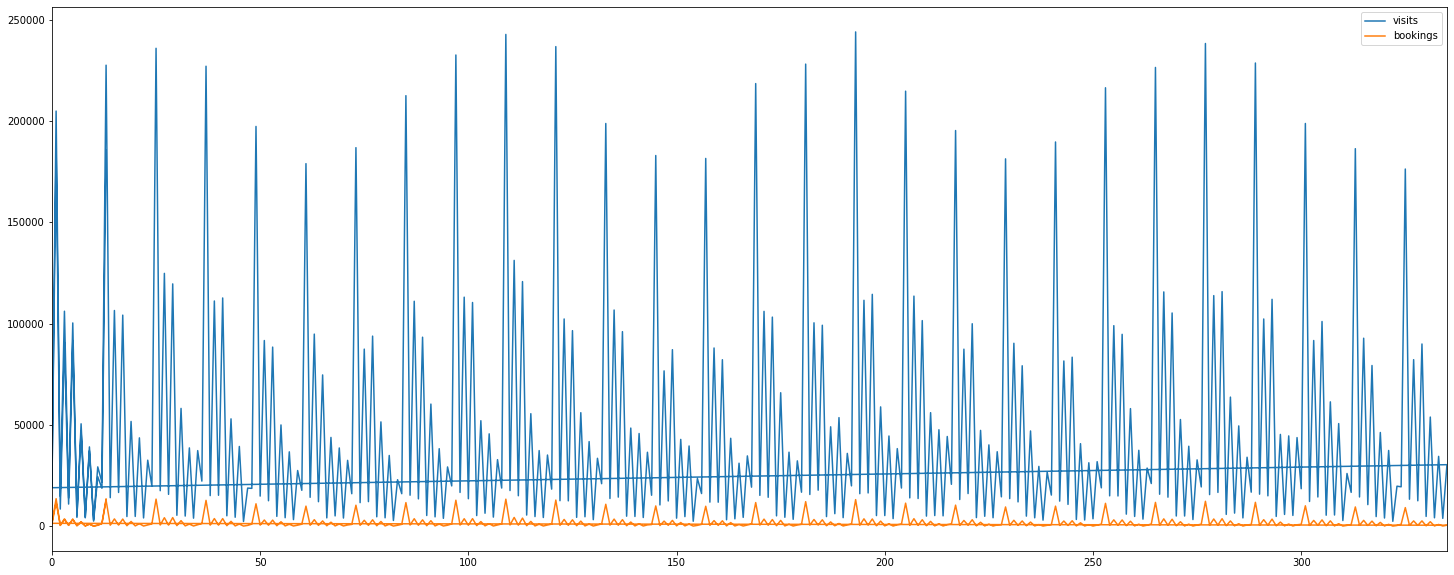

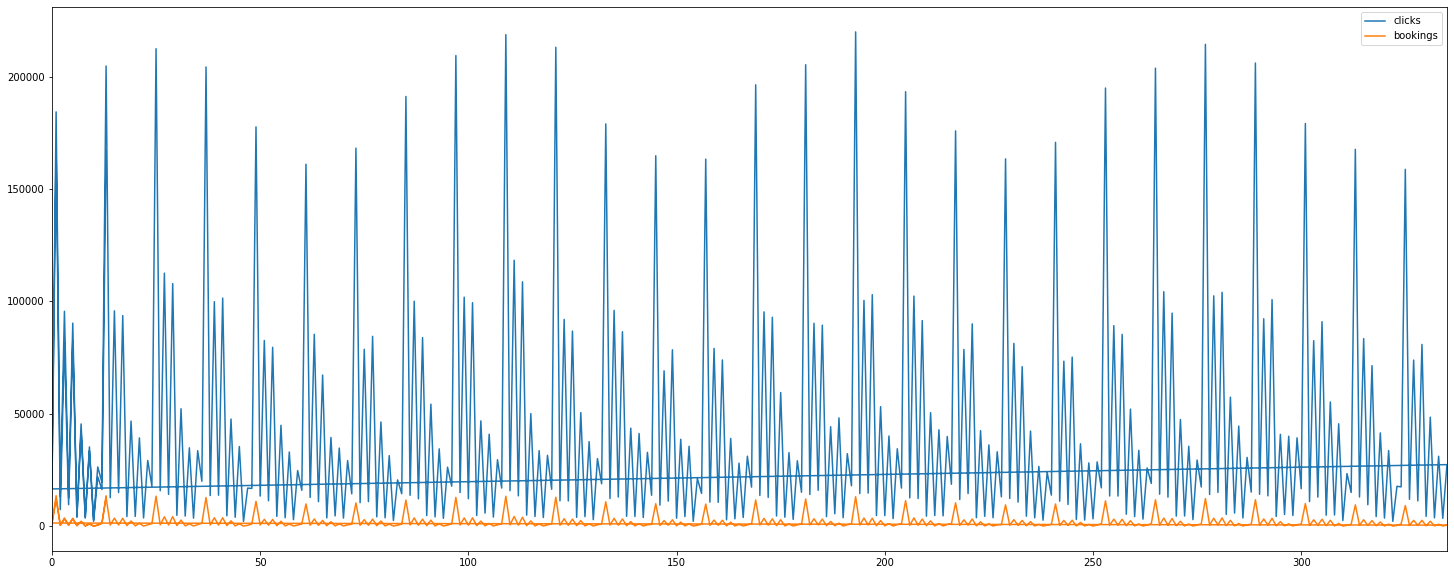

In [38]:
compare_correlation_graph(df_total)

In [39]:
df_analysis.head()

,booking_amount,booking_amount_cat,booking_amount_cat_3,booking_clusters,bookings,bookings_cat,bookings_cat_2,clicks,clicks_cat,group_control,...,platform_JP,platform_UK,platform_US,revenue,revenue_cat,revenue_cat_2,visits,visits_cat,ymd,ymd_2
0,2.152443e+05,0,0,2,1072,0,0,17289,1,0,...,0,0,1,23752.189583,0,0,19219,1,20190201,20190201
1,2.176644e+06,4,4,0,11775,5,5,184276,6,1,...,0,0,1,250169.068436,8,8,204923,6,20190201,20190201
2,9.205639e+04,0,0,3,492,0,0,13273,0,0,...,0,0,0,10381.106892,0,0,14788,0,20190201,20190201
3,7.719909e+05,1,1,1,3621,1,1,95555,3,1,...,0,0,0,72563.524075,2,2,106112,3,20190201,20190201
4,1.003405e+05,0,0,3,486,0,0,12441,0,0,...,0,1,0,10472.761095,0,0,13823,0,20190201,20190201


In [40]:
df_total.dtypes

ymd                object
platform           object
group              object
visits              int64
clicks              int64
revenue           float64
bookings            int64
booking_amount    float64
dtype: object

In [41]:
df_total['Year'] = df_total.ymd.str.split('-', expand=True)[0]
df_total['Month'] = df_total.ymd.str.split('-', expand=True)[1]
df_total['Day'] = df_total.ymd.str.split('-', expand=True)[2]

df_1['Year'] = df_1.ymd.str.split('-', expand=True)[0]
df_1['Month'] = df_1.ymd.str.split('-', expand=True)[1]
df_1['Day'] = df_1.ymd.str.split('-', expand=True)[2]

df_2['Year'] = df_2.ymd.str.split('-', expand=True)[0]
df_2['Month'] = df_2.ymd.str.split('-', expand=True)[1]
df_2['Day'] = df_2.ymd.str.split('-', expand=True)[2]


In [42]:
df_total.dtypes

ymd                object
platform           object
group              object
visits              int64
clicks              int64
revenue           float64
bookings            int64
booking_amount    float64
Year               object
Month              object
Day                object
dtype: object

In [43]:
df_total['Day'] = df_total['Day'].astype(str).astype(int)
df_1['Day'] = df_1['Day'].astype(str).astype(int)
df_2['Day'] = df_2['Day'].astype(str).astype(int)

In [44]:
df_total['Days'] = df_total['Day'] % 7
df_1['Days'] = df_1['Day'] % 7
df_2['Days'] = df_2['Day'] % 7

In [45]:
df_total[df_total.Month == '05'].head()

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount,Year,Month,Day,Days
0,2019-05-01,US,test,18978,16560,22868.156215,1400,3.079888e+05,2019,05,1,1
1,2019-05-01,US,control,188086,169373,208131.939979,13558,2.780706e+06,2019,05,1,1
2,2019-05-01,DE,test,8441,7358,5214.547510,348,6.683872e+04,2019,05,1,1
3,2019-05-01,DE,control,90793,81661,55249.407028,3185,6.243513e+05,2019,05,1,1
4,2019-05-01,UK,test,10907,9557,8853.686349,403,8.820581e+04,2019,05,1,1


In [46]:
feb_day_mapping = {
    0 : "Thu",
    1 : "Fri",
    2 : "Sat",
    3 : "Sun",
    4 : "Mon",
    5 : "Tue",
    6 : "Wed",
}

may_day_mapping = {
    0 : "Tue",
    1 : "Wed",
    2 : "Thu",
    3 : "Fri",
    4 : "Sat",
    5 : "Sun",
    6 : "Mon",
}

In [47]:
df_1['week_days'] = df_1.Days.replace(feb_day_mapping)
df_1.head()

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount,Year,Month,Day,Days,week_days
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05,2019,02,1,1,Fri
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06,2019,02,1,1,Fri
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04,2019,02,1,1,Fri
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05,2019,02,1,1,Fri
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05,2019,02,1,1,Fri


In [48]:
df_2['week_days'] = df_2.Days.replace(may_day_mapping)
df_2.head()

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount,Year,Month,Day,Days,week_days
0,2019-05-01,US,test,18978,16560,22868.156215,1400,3.079888e+05,2019,05,1,1,Wed
1,2019-05-01,US,control,188086,169373,208131.939979,13558,2.780706e+06,2019,05,1,1,Wed
2,2019-05-01,DE,test,8441,7358,5214.547510,348,6.683872e+04,2019,05,1,1,Wed
3,2019-05-01,DE,control,90793,81661,55249.407028,3185,6.243513e+05,2019,05,1,1,Wed
4,2019-05-01,UK,test,10907,9557,8853.686349,403,8.820581e+04,2019,05,1,1,Wed


In [49]:
#temp_rev_total = df_total['revenue'].groupby(df_total['Days']).mean().sort_values(ascending=False)
temp_rev_feb = df_1['revenue'].groupby(df_1['week_days']).mean().sort_values(ascending=False)
temp_rev_may = df_2['revenue'].groupby(df_2['week_days']).mean().sort_values(ascending=False)

#print("Average REVENUE acording to the days :\n", temp_rev_total)
print("In FEB, Average REVENUE acording to the days :\n", temp_rev_feb)
print("In MAY, Average REVENUE acording to the days :\n", temp_rev_may)


In FEB, Average REVENUE acording to the days :
 week_days
Sun    47468.860274
Sat    46374.385774
Mon    46302.978835
Fri    43334.860035
Tue    41457.463333
Thu    37458.677459
Wed    35503.018807
Name: revenue, dtype: float64
In MAY, Average REVENUE acording to the days :
 week_days
Sun    49339.008389
Sat    48119.555982
Mon    43092.688229
Tue    42882.890395
Fri    41494.965801
Wed    38296.055098
Thu    37403.357414
Name: revenue, dtype: float64


In [50]:
df_1.head().append(df_1.tail())

,ymd,platform,group,visits,clicks,revenue,bookings,booking_amount,Year,Month,Day,Days,week_days
0,2019-02-01,US,test,19219,17289,23752.189583,1072,2.152443e+05,2019,02,1,1,Fri
1,2019-02-01,US,control,204923,184276,250169.068436,11775,2.176644e+06,2019,02,1,1,Fri
2,2019-02-01,DE,test,14788,13273,10381.106892,492,9.205639e+04,2019,02,1,1,Fri
3,2019-02-01,DE,control,106112,95555,72563.524075,3621,7.719909e+05,2019,02,1,1,Fri
4,2019-02-01,UK,test,13823,12441,10472.761095,486,1.003405e+05,2019,02,1,1,Fri
331,2019-02-28,AU,control,53861,48482,41530.734091,2183,5.039255e+05,2019,02,28,0,Thu
332,2019-02-28,BR,test,4129,3703,1917.595339,100,2.032529e+04,2019,02,28,0,Thu
333,2019-02-28,BR,control,34450,31096,15142.516783,846,1.991500e+05,2019,02,28,0,Thu
334,2019-02-28,JP,test,3844,3491,2451.847750,67,1.371000e+04,2019,02,28,0,Thu
335,2019-02-28,JP,control,30346,27368,20287.690753,465,9.486661e+04,2019,02,28,0,Thu


In [51]:
df_1.dtypes

ymd                object
platform           object
group              object
visits              int64
clicks              int64
revenue           float64
bookings            int64
booking_amount    float64
Year               object
Month              object
Day                 int64
Days                int64
week_days          object
dtype: object

In [52]:
revenue_analys_columns = ['visits', 'clicks']

In [53]:
def analyse_correlation_graph():
  for colu in revenue_analys_columns:
    df_total[[colu, 'revenue']][:350].plot(figsize=(15,6))
    print("Revenue average over ", colu, " is ", df_total.revenue.sum() / df_total[colu].sum())

Revenue average over  visits  is  0.8629868310870109
Revenue average over  clicks  is  0.9602676647087155


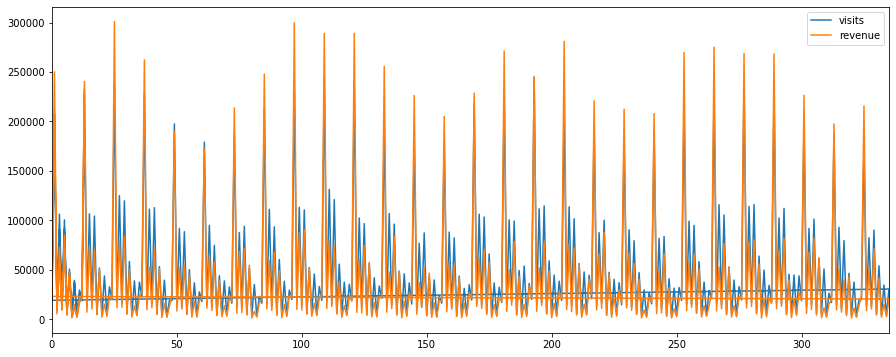

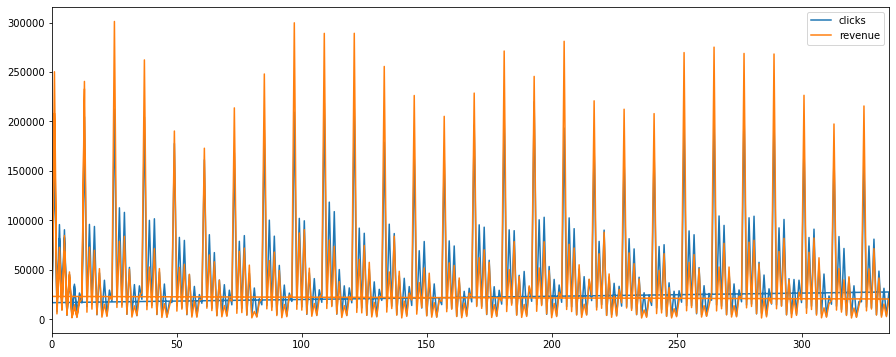

In [54]:
analyse_correlation_graph()

Revenue average over bookings is  19.767734323810387


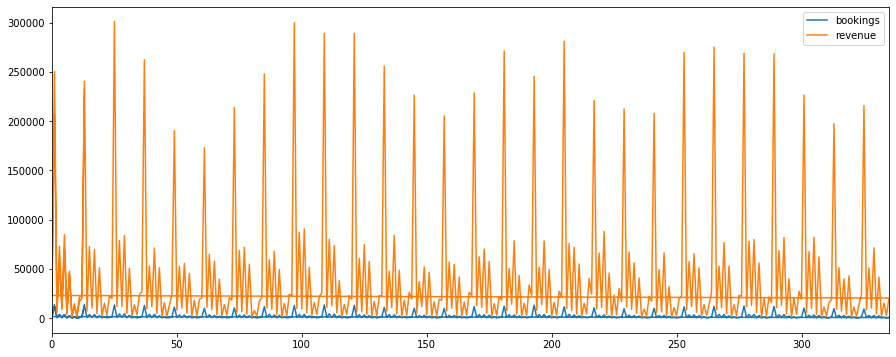

In [55]:
    df_total[['bookings', 'revenue']][:350].plot(figsize=(15,6))
    print("Revenue average over bookings is ", df_total.revenue.sum() / df_total.bookings.sum())

Revenue average over booking_amount is  0.09576913015098515


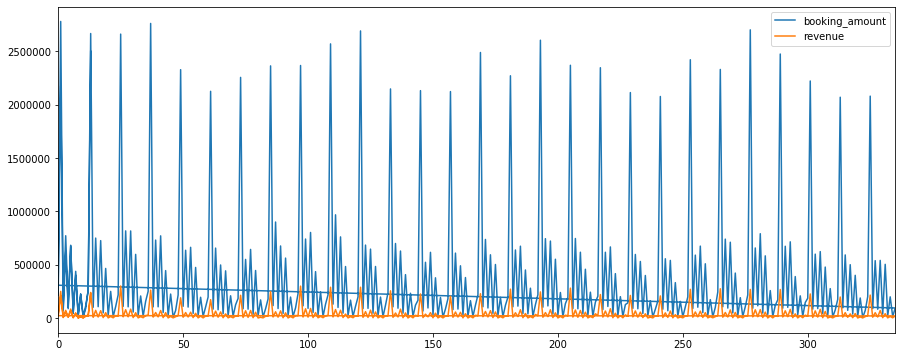

In [56]:
    df_total[['booking_amount', 'revenue']][:350].plot(figsize=(15,6))
    print("Revenue average over booking_amount is ", df_total.revenue.sum() / df_total.booking_amount.sum())

CLICKS average over VISITS is  0.8986940441744298


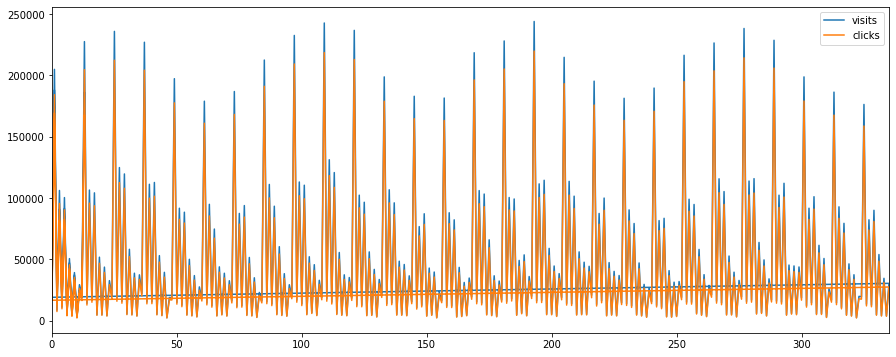

In [57]:
    df_total[['visits','clicks']][:350].plot(figsize=(15,6))
    print("CLICKS average over VISITS is ", df_total.clicks.sum() / df_total.visits.sum())

In [58]:
df_analysis.head()

,booking_amount,booking_amount_cat,booking_amount_cat_3,booking_clusters,bookings,bookings_cat,bookings_cat_2,clicks,clicks_cat,group_control,...,platform_JP,platform_UK,platform_US,revenue,revenue_cat,revenue_cat_2,visits,visits_cat,ymd,ymd_2
0,2.152443e+05,0,0,2,1072,0,0,17289,1,0,...,0,0,1,23752.189583,0,0,19219,1,20190201,20190201
1,2.176644e+06,4,4,0,11775,5,5,184276,6,1,...,0,0,1,250169.068436,8,8,204923,6,20190201,20190201
2,9.205639e+04,0,0,3,492,0,0,13273,0,0,...,0,0,0,10381.106892,0,0,14788,0,20190201,20190201
3,7.719909e+05,1,1,1,3621,1,1,95555,3,1,...,0,0,0,72563.524075,2,2,106112,3,20190201,20190201
4,1.003405e+05,0,0,3,486,0,0,12441,0,0,...,0,1,0,10472.761095,0,0,13823,0,20190201,20190201


In [59]:
#Export dataframe as a csv
df_total.to_csv("df_total.csv")#, index=True)
df_analysis.to_csv("df_analysis.csv")#, index=True)